In [37]:
import os
import random
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab-Notebooks/recommander system

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab-Notebooks/recommander system


In [38]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
df = pd.read_csv('data/FLOWSTER_SCRAPED_DATA_20210217231725.csv')

In [40]:
df.head()

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,0,About the Amazon Specific Category,Amazon Specific,[],Have questions about using the Amazon marketpl...,[],0,0,0,0
1,1,Amazon FBM,Amazon Specific,[],Hello everyone!\nCan you help me know how much...,['@Bitclu are you just looking for shipping es...,"Jan 21, 2021 8:52 am",1,98,5
2,2,Pricing products on Amazon,Amazon Specific,[],How to set the price of products on Amazon con...,['@Bitclu column AH in the pricing and margin ...,"Jan 14, 2021 8:06 am",1,58,1
3,3,Choosing a niche for selling on Amazon,Amazon Specific,['All Other Amazon Related Issues'],Trent recommends choosing a niche category for...,['@almoodie You may have trouble getting input...,"Jan 2, 2020 7:54 pm",0,442,3
4,4,Amazon FBA,Amazon Specific,['Software & Tools'],Hello\nI was thinking to use Amazon fulfillmen...,['Think about it as another channel to sell yo...,"Oct 8, 2020 9:19 am",2,273,3


In [41]:
df.shape

(280, 10)

In [42]:
#to see any null value present in our dataset
df.isnull().sum()

Unnamed: 0      0
Topic Title     0
Category        0
Tags            0
Leading Post    1
Post Replies    0
Created_at      0
Likes           0
Views           0
Replies         0
dtype: int64

There is one missing value in Leading Post, which we can delete

In [43]:
df.dropna(axis=0, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 279
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    279 non-null    int64 
 1   Topic Title   279 non-null    object
 2   Category      279 non-null    object
 3   Tags          279 non-null    object
 4   Leading Post  279 non-null    object
 5   Post Replies  279 non-null    object
 6   Created_at    279 non-null    object
 7   Likes         279 non-null    int64 
 8   Views         279 non-null    object
 9   Replies       279 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 24.0+ KB


## Density of each category

Text(0, 0.5, 'no of posts')

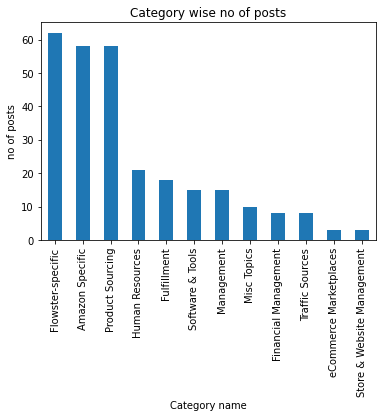

In [45]:
df['Category'].value_counts().plot.bar()
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

In [46]:
df['post'] = df['Topic Title'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies'] + ' ' + df['Tags'] + ' ' + df['Category']

In [103]:
df['post1'] = df['Topic Title'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies'] + ' ' + df['Tags'] 

## Table generation with Word count,Char count, Avg Word count & Stopwords

In [47]:
df['word_count'] = df['post'].apply(lambda x: len(str(x).split(" "))) ##to calculate word count 
df['char_count'] = df['post'].str.len() ## this also includes spaces
#to calculate avg word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['post'].apply(lambda x: avg_word(x))
#for stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['post'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['post','word_count','char_count','avg_word','stopwords']].head()

,post,word_count,char_count,avg_word,stopwords
0,About the Amazon Specific Category Have questi...,34,215,5.352941,12
1,Amazon FBM Hello everyone!\nCan you help me kn...,215,1168,4.495283,88
2,Pricing products on Amazon How to set the pric...,47,282,5.021277,16
3,Choosing a niche for selling on Amazon Trent r...,245,1492,4.824219,92
4,Amazon FBA Hello\nI was thinking to use Amazon...,109,647,4.890909,39


## Cleaning 

In [48]:
df['post'][2]

"Pricing products on Amazon How to set the price of products on Amazon considering the Amazon fees, service taxes, and commission? ['@Bitclu column AH in the pricing and margin calculator will tell you the retail price needed for your desired margin in cell AH1.'] [] Amazon Specific"

In [49]:
import re
import string
import string
from bs4 import BeautifulSoup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    
    text = text.replace('[{}]'.format(string.punctuation), '')
    text = text.replace(r'\n', ' ')
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in stop) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)

In [104]:
df['post1'] = df['post1'].apply(clean_text)

In [50]:
#df['post'] = df['post'].apply(lambda x: clean_text(str(x)))
df['post'].head()

0    amazon specific category questions using amazo...
1    amazon fbm hello everyonecan help know much fb...
2    pricing products amazon set price products ama...
3    choosing niche selling amazon trent recommends...
4    amazon fba helloi thinking use amazon fulfillm...
Name: post, dtype: object

### Rare words removal

In [51]:
freq = pd.Series(' '.join(df['post']).split()).value_counts()[-10:]
freq

ofhas                         1
shed                          1
824                           1
websiteusage                  1
nola                          1
firstif                       1
false                         1
etsy                          1
20get                         1
emailsselection_8431283465    1
dtype: int64

In [52]:
freq = list(freq.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

### Spelling correction

In [53]:
!pip install textblob

In [54]:
from textblob import TextBlob
df['post'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    amazon specific category questions using amazo...
1    amazon for hello everyonecan help know much fo...
2    pricking products amazon set price products am...
3    choosing nice selling amazon trent recommends ...
4    amazon ba hello thinking use amazon fulfillmen...
Name: post, dtype: object

## Wordcloud by category

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df['Category']=df['Category'].apply(lambda x:['No category'] if str(x)=='NaN' else str(x))

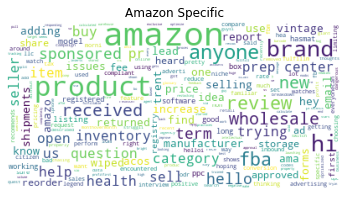

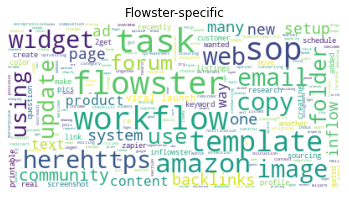

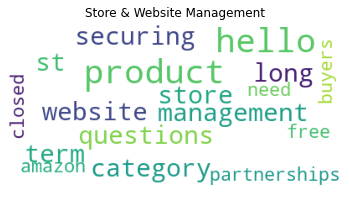

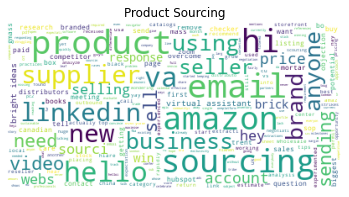

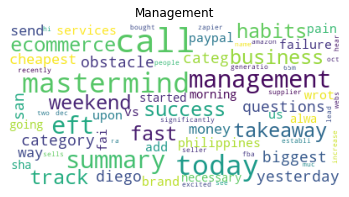

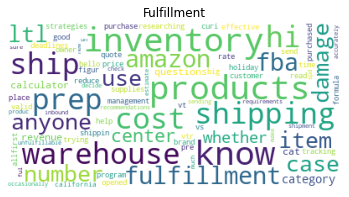

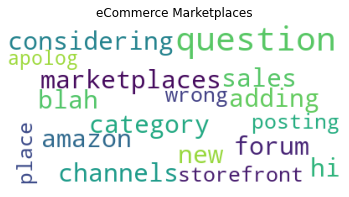

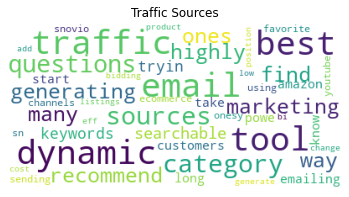

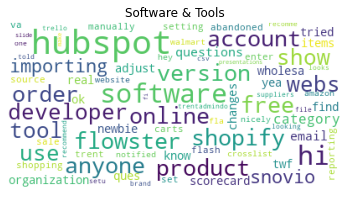

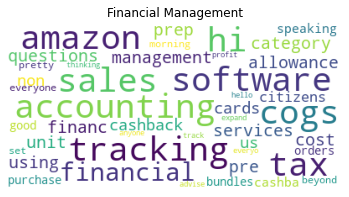

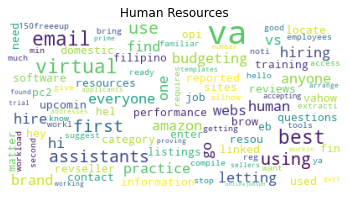

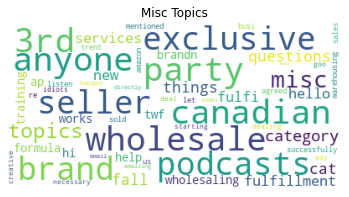

In [56]:
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.Category.unique():
	wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc.generate(df.post[(df.post.notnull()) & (df.Category == x)].to_string())
	plt.imshow(wc)
	plt.title(x)
	plt.axis("off")
	plt.show()

### Extract keywords using Rake

In [57]:
df1 = pd.DataFrame()
df1['post'] = df['post']
df1['Topic Title'] = df['Topic Title']
# to extract key words from Plot to a l
!pip install rake_nltk
from rake_nltk import Rake
df1['Key_words'] = ''   # initializing a new column
r = Rake()   # use Rake to discard stop words (based on english stopwords from NLTK)
i = 0
for index, row in df1.iterrows():
    
    r.extract_keywords_from_text(row['post'])   # to extract key words from Plot, default in lower case
    key_words_dict_scores = r.get_word_degrees()    # to get dictionary with key words and their scores
    row['Key_words'] = list(key_words_dict_scores.keys()) 
    df1['Key_words'][i] =  list(key_words_dict_scores.keys())  # to assign list of key words to new column
    i +=1

df1.head()

,post,Topic Title,Key_words
0,amazon specific category questions using amazo...,About the Amazon Specific Category,"[amazon, specific, category, questions, using,..."
1,amazon fbm hello everyonecan help know much fb...,Amazon FBM,"[amazon, fbm, hello, everyonecan, help, know, ..."
2,pricing products amazon set price products ama...,Pricing products on Amazon,"[pricing, products, amazon, set, price, consid..."
3,choosing niche selling amazon trent recommends...,Choosing a niche for selling on Amazon,"[choosing, niche, selling, amazon, trent, reco..."
4,amazon fba helloi thinking use amazon fulfillm...,Amazon FBA,"[amazon, fba, helloi, thinking, use, fulfillme..."


In [58]:
# to combine 4 lists (4 columns) of key words into 1 sentence under Bag_of_words column
df1['Bag_of_words'] = ''
columns = ['Key_words']
i = 0
for index, row in df1.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    df1['Bag_of_words'][i] = words
    i +=1
    
# strip white spaces infront and behind, replace multiple whitespaces (if any)
df1['Bag_of_words'] = df1['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

df1 = df1[['Topic Title','Bag_of_words']]
df1

,Topic Title,Bag_of_words
0,About the Amazon Specific Category,amazon specific category questions using marke...
1,Amazon FBM,amazon fbm hello everyonecan help know much co...
2,Pricing products on Amazon,pricing products amazon set price considering ...
3,Choosing a niche for selling on Amazon,choosing niche selling amazon trent recommends...
4,Amazon FBA,amazon fba helloi thinking use fulfillment ser...
...,...,...
275,Podcasts,us warehousing necessary canadian starting goo...
276,Exclusive With Brands,dealing idiots anyone creative way deal seller...
277,U.S. Warehousing necessary as Canadian startin...,emailing hubspot looks like vas email directly...
278,Dealing With Idiots,emailing hubspot looks like vas email directly...


In [59]:
# an example to see what is in the Bag_of_words
df1['Bag_of_words'][0]

'amazon specific category questions using marketplace use please sure select appropriate subcategory'

### create vector representation for Bag_of_words and the similarity matrix

The recommender model can only read and compare a vector (matrix) with another, so we need to convert the 'Bag_of_words' into vector representation using CountVectorizer, which is a simple frequency counter for each word in the bag_of_words column. Once I have the matrix containing the count for each word, I can apply the cosine_similarity function to compare similarities between posts.

In [60]:
# to generate the count matrix
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(df1['Bag_of_words'])
count_matrix

<279x5080 sparse matrix of type '<class 'numpy.int64'>'
	with 20114 stored elements in Compressed Sparse Row format>

In [61]:
8947
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.10136061 0.12309149 ... 0.         0.         0.        ]
 [0.10136061 1.         0.07485977 ... 0.05370216 0.05370216 0.05370216]
 [0.12309149 0.07485977 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.05370216 0.         ... 1.         1.         1.        ]
 [0.         0.05370216 0.         ... 1.         1.         1.        ]
 [0.         0.05370216 0.         ... 1.         1.         1.        ]]


Similarity Matrix

Next is to create a Series of post titles, so that the series index can match the row/column index of the similarity matrix



In [62]:
# to create a Series for post titles which can be used as indices (each index is mapped to a post)
indices = pd.Series(df1['Topic Title'])
indices[:5]

0        About the Amazon Specific Category
1                                Amazon FBM
2                Pricing products on Amazon
3    Choosing a niche for selling on Amazon
4                                Amazon FBA
Name: Topic Title, dtype: object

In [63]:
indices[indices=='Amazon FBM']

1    Amazon FBM
Name: Topic Title, dtype: object

In [64]:
# this function takes in a post title as input and returns the top 10 recommended (similar) posts

def recommend(title, cosine_sim = cosine_sim):
    recommended_posts = []
    idx = indices[indices == title].index[0]   # to get the index of the post title matching the i post ovie
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_10_indices = list(score_series.iloc[1:11].index)   # to get the indices of top 10 most sipostsitself)
    
    for i in top_10_indices:   # to append the titles of top 10 similar posts to the recommended_posts list
        recommended_posts.append(list(df1['Topic Title'])[i])
        
    return recommended_posts

recommend('Pricing products on Amazon')

['When to Pull Fulfillable Amazon FBA Inventory?',
 'Issues with adding products on Amazon',
 'Amazon Free Products',
 'Can you sell branded products on Amazon uk',
 'Amazon FBA',
 'Storefront Question',
 'About the Amazon Specific Category',
 'Tracking COGs beyond Amazon',
 'Amazon sellers say online retail giant is trying to help itself, not consumers',
 'Long Term Storage Fees']

# Simple transformers


In [65]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

simpletransformers==0.60.9


In [66]:
!pip install tokenizers==0.9.4

In [106]:
new_df = pd.DataFrame()
new_df['post'] = df['post1']
new_df['category'] = df['Category']
new_df['post'] = new_df['post'].apply(lambda x: str(x))
new_df['category'] = new_df['category'].apply(lambda x: str(x))

In [107]:
new_df['category'].unique()

array(['Amazon Specific', 'Flowster-specific',
       'Store & Website Management', 'Product Sourcing', 'Management',
       'Fulfillment', 'eCommerce Marketplaces', 'Traffic Sources',
       'Software & Tools', 'Financial Management', 'Human Resources',
       'Misc Topics'], dtype=object)

In [108]:
my_categories = ['Amazon Specific', 'Flowster-specific',
       'Store & Website Management', 'Product Sourcing', 'Management',
       'Fulfillment', 'eCommerce Marketplaces', 'Traffic Sources',
       'Software & Tools', 'Financial Management', 'Human Resources',
       'Misc Topics']

In [109]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['category'] = new_df.apply(lambda x:  my_categories.index(x['category']),axis=1)

In [110]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (251, 2)
test shape:  (28, 2)


In [143]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 10}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-cased",
    num_labels=12,
    args=train_args
)
model2 = ClassificationModel(
    "roberta", "roberta-base",
    num_labels=5,
    args=train_args
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [145]:
# Train the model
model2.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/32 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

In [ ]:
result

### Save the model

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','flowsterforum-bert-categclass')

In [ ]:
!tar -zxvf ./amazonforum-bert-categclass.tar.gz

In [ ]:
!rm -rf outputs

### test the model on real data

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('flowsterforum-bert-categclass')

In [ ]:
post1 ="Converting from TWF Scouting & Sourcing Spreadsheet to WEBS Hello,I purchased WEBS and am getting acquainted with the processes. My question is I have a little over 200 product leads I’ve scouted, have passed the 21-point checklist, and have email contacts or webform links to start contacting in my TWF Scouting & Sourcing Spreadsheet. I would like to upload this information to HubSpot to start sending out emails. I have set my Contact Properties and Data Fields up in HubSpot according to WEBS setup. Do I transfer the info from TWF Spreadsheet into the fields of the WEBS Master Import Sheet or the Product Extraction Sheet and then upload to HubSpot?If not, is there a more efficient way of doing this that gets the same result? Thank You"

predictions, raw_outputs = model.predict([clean_text(post1)])

print(my_categories[predictions[0]])
# original category : Flowster-specific

Great !!

In [ ]:
post2 = "Tracking COGs beyond Amazon Hi -I’m thinking of expanding to Walmart, Jet, and Ebay. I have SellerLegend for Amazon COGs accounting. However, I’m outta luck with Walmart, Jet, and Ebay. How do I incorporate those with as little messing around as possible?Dan"
predictions, raw_outputs = model.predict([clean_text(post2)])

print(my_categories[predictions[0]])
# original category : Financial Management

The model needs more fine tuning to improve the accuracy